# DCD (Dominant Color Descriptor)

In [1]:
from math import sqrt
import random
try:
  import Image
except ImportError:
  from PIL import Image

In [2]:
class Point:
  
  def __init__(self, coordinates):
    self.coordinates = coordinates

In [3]:
class Cluster:
  
  def __init__(self, center, points):
    self.center = center
    self.points = points

In [4]:
class KMeans:
  
  def __init__(self, n_clusters, min_diff = 1):
    self.n_clusters = n_clusters
    self.min_diff = min_diff
    
  def calculate_center(self, points):    
    n_dim = len(points[0].coordinates)    
    vals = [0.0 for i in range(n_dim)]    
    for p in points:
      for i in range(n_dim):
        vals[i] += p.coordinates[i]
    coords = [(v / len(points)) for v in vals]    
    return Point(coords)
  
  def assign_points(self, clusters, points):
    plists = [[] for i in range(self.n_clusters)]

    for p in points:
      smallest_distance = float('inf')

      for i in range(self.n_clusters):
        distance = euclidean(p, clusters[i].center)
        if distance < smallest_distance:
          smallest_distance = distance
          idx = i

      plists[idx].append(p)
    
    return plists
    
  def fit(self, points):
    clusters = [Cluster(center=p, points=[p]) for p in random.sample(points, self.n_clusters)]
    
    while True:

      plists = self.assign_points(clusters, points)

      diff = 0

      for i in range(self.n_clusters):
        if not plists[i]:
          continue
        old = clusters[i]
        center = self.calculate_center(plists[i])
        new = Cluster(center, plists[i])
        clusters[i] = new
        diff = max(diff, euclidean(old.center, new.center))

      if diff < self.min_diff:
        break

    return clusters

In [5]:
def euclidean(p, q):
  n_dim = len(p.coordinates)
  return sqrt(sum([
      (p.coordinates[i] - q.coordinates[i]) ** 2 for i in range(n_dim)
  ]))

In [6]:
def get_points(image_path):  
  img = Image.open(image_path)
  img.thumbnail((200, 400))
  img = img.convert("RGB")
  w, h = img.size
  
  points = []
  for count, color in img.getcolors(w * h):
    for _ in range(count):
      points.append(Point(color))
    
  return points

In [7]:
def rgb_to_hex(rgb):
  return '#%s' % ''.join(('%02x' % p for p in rgb))

def get_colors(filename, n_colors=3):
  points = get_points(filename)
  clusters = KMeans(n_clusters=n_colors).fit(points)
  clusters.sort(key=lambda c: len(c.points), reverse = True)
  rgbs = [map(int, c.center.coordinates) for c in clusters]
  return list(map(rgb_to_hex, rgbs))

In [8]:
colors = get_colors('/content/drive/MyDrive/Classroom/TKC/query/test_blus_navy.jpg', n_colors=3)
", ".join(colors)

'#d1ac9a, #162142, #e7ccc3'

In [9]:
colors = get_colors('/content/drive/MyDrive/Classroom/TKC/query/test_blus_merah.jpg', n_colors=3)
", ".join(colors)

'#e5e0e3, #6e2537, #c7b2b0'

In [10]:
colors = get_colors('/content/drive/MyDrive/Classroom/TKC/query/test_gamis_biru.jpg', n_colors=3)
", ".join(colors)

'#e4e1e3, #b3a197, #1b1e34'

In [11]:
colors = get_colors('/content/drive/MyDrive/Classroom/TKC/query/test_gamis_merah.jpg', n_colors=3)
", ".join(colors)

'#cdc8c0, #666353, #67171f'

# PHOG (Pyramid Histogram of Oriented Gradient)

In [12]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

(1080, 1080, 3)


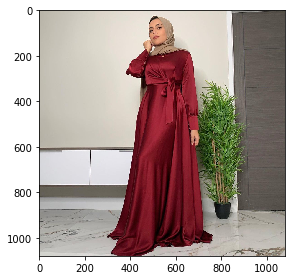

In [13]:
img = imread('/content/drive/MyDrive/Classroom/TKC/query/test_gamis_merah.jpg')
imshow(img)
print(img.shape)

(128, 64, 3)


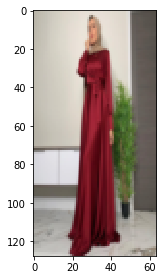

In [14]:
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

In [15]:
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
fd.shape

(3780,)

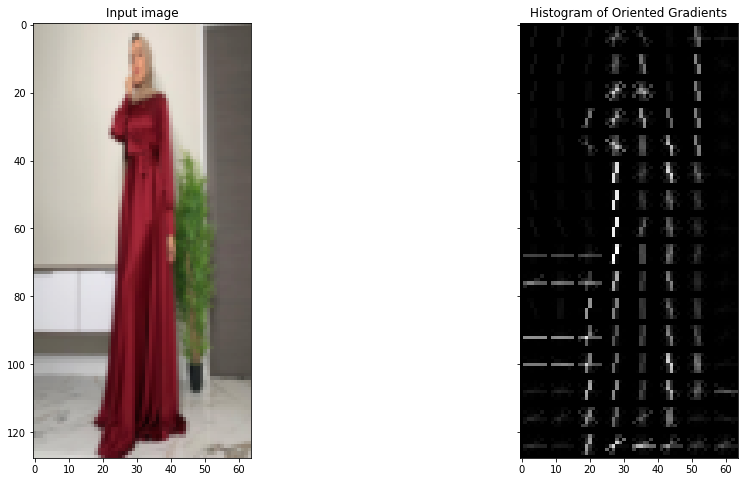

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()